In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [4]:
data = pd.read_csv("s.csv")
print(data)


    age  average length cycle
0    22                    28
1    22                    29
2    22                    28
3    22                    29
4    22                    29
5    22                    28
6    22                    29
7    22                    28
8    22                    27
9    22                    28
10   22                    28
11   22                    29
12   22                    27
13   22                    29
14   22                    28
15   22                    29
16   22                    27
17   22                    27
18   22                    29
19   22                    28
20   22                    29
21   22                    28
22   22                    29
23   22                    28
24   22                    29
25   22                    29
26   22                    28
27   22                    29
28   22                    27
29   22                    28
30   22                    28
31   22                    29
32   22   

In [5]:
data.head()


,age,average length cycle
0,22,28
1,22,29
2,22,28
3,22,29
4,22,29


In [6]:

data = data["average length cycle"]

In [7]:
#Make sure there are no null values
#sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
data.isnull().value_counts()

False    33
Name: average length cycle, dtype: int64

In [9]:
#Check the datatypes
print(data.dtypes)

int64


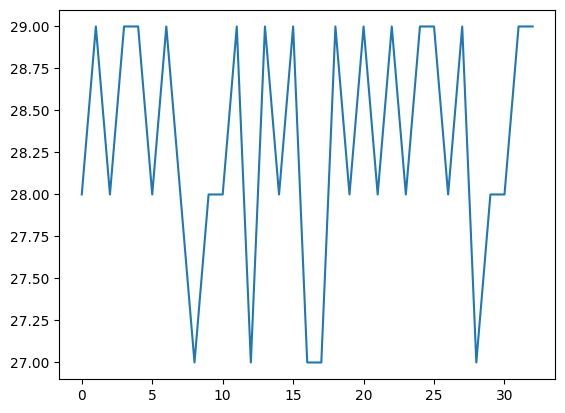

In [10]:
import matplotlib.pyplot as plt
plt.plot(data)

In [11]:
data.dtypes

dtype('int64')

In [12]:
data.head()

0    28
1    29
2    28
3    29
4    29
Name: average length cycle, dtype: int64

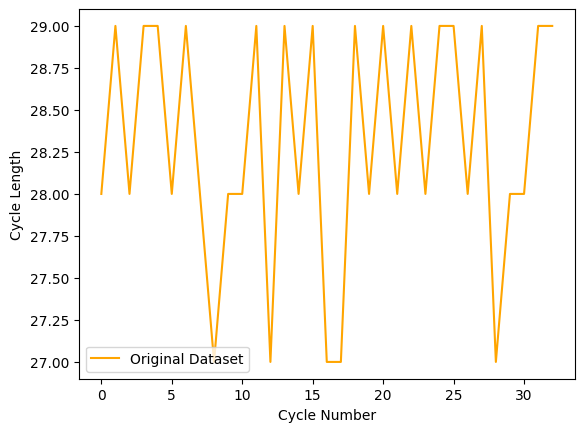

In [13]:
#plt.plot(a,label="Model Prediction",color='blue')
plt.plot(data,label="Original Dataset",color="orange")
plt.xlabel("Cycle Number")
plt.ylabel("Cycle Length")
plt.legend(loc="best")

In [14]:
#Set the index of the Month 
#data.set_index('Timestamp',inplace=True)


In [15]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.1356304267435028, True)

<Axes: >

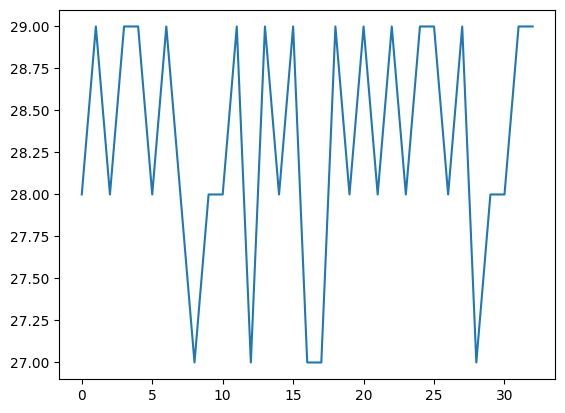

In [16]:
data.plot()

In [17]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    result = adfuller(data)
    pvalue = result[1]
    if pvalue < 0.05:
        print("The data is stationary with p-value", pvalue)
    else:
        print("The data is not stationary with p-value", pvalue)
    
    return pvalue

# check for stationarity in the data
pvalue = check_stationarity(data)

# apply differencing to make the data stationary if necessary
if pvalue >= 0.05:
    differenced_data = data.diff().dropna()
    check_stationarity(differenced_data)
else:
    differenced_data = data




The data is stationary with p-value 1.7527876081309006e-09


In [18]:
print(differenced_data)

0     28
1     29
2     28
3     29
4     29
5     28
6     29
7     28
8     27
9     28
10    28
11    29
12    27
13    29
14    28
15    29
16    27
17    27
18    29
19    28
20    29
21    28
22    29
23    28
24    29
25    29
26    28
27    29
28    27
29    28
30    28
31    29
32    29
Name: average length cycle, dtype: int64


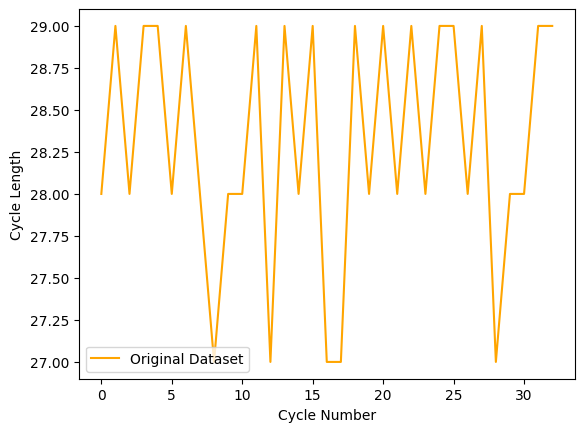

In [19]:
#plt.plot(a,label="Model Prediction",color='blue')
plt.plot(data,label="Original Dataset",color="orange")
plt.xlabel("Cycle Number")
plt.ylabel("Cycle Length")
plt.legend(loc="best")

In [20]:
# spilting the dataset
from sklearn.model_selection import train_test_split

X = differenced_data # dataset

train_size = 0.75
test_size = 1 - train_size
X_train, X_test = train_test_split(X, train_size=train_size, test_size=test_size, shuffle=False)


In [21]:
X_train.tail()

19    28
20    29
21    28
22    29
23    28
Name: average length cycle, dtype: int64

In [22]:
X_test.tail()

28    27
29    28
30    28
31    29
32    29
Name: average length cycle, dtype: int64

In [23]:
X_test.head()

24    29
25    29
26    28
27    29
28    27
Name: average length cycle, dtype: int64

Text(0, 0.5, 'CycleLength')

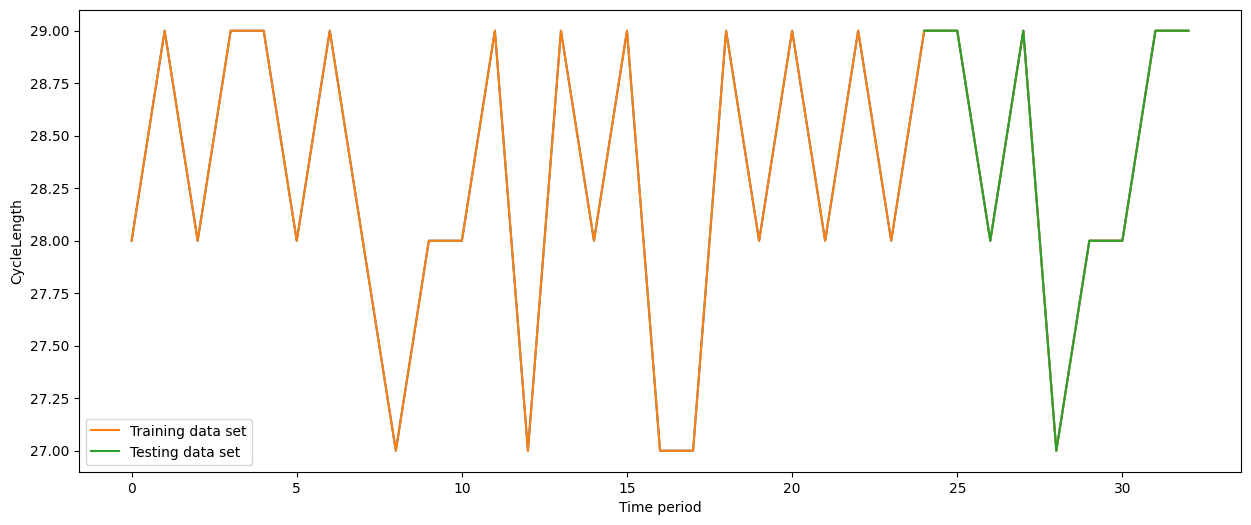

In [24]:
plt.figure(figsize=(15,6))
plt.plot(data)
plt.xlabel("Time period")
plt.ylabel("Average period cycle")
plt.plot(data,label="Training data set")
#plt.plot(range(len(X_train), len(X_train)+len(X_test)), X_test, color='orange', label='test')
plt.plot(X_test,label="Testing data set")
plt.xlabel('Time period')
plt.legend(loc = 'best')
plt.ylabel('CycleLength')



In [25]:
arima_model =  auto_arima(X_train,start_p=0, d=0, start_q=0, 
                          max_p=5, max_d=0, max_q=10, start_P=0, 
                          D=1, start_Q=0, max_P=10, max_D=5,
                          max_Q=5, m=3, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=69.637, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=68.025, Time=0.02 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=67.637, Time=0.00 sec
 ARIMA(0,0,0)(1,1,0)[3] intercept   : AIC=68.065, Time=0.01 sec
 ARIMA(0,0,0)(0,1,1)[3] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,0)(1,1,1)[3] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[3] intercept   : AIC=69.799, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[3] intercept   : AIC=69.904, Time=0.01 sec
 ARIMA(1,0,1)(0,1,0)[3] intercept   : AIC=71.085, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,1,0)[3]          
Total fit time: 0.201 seconds


In [26]:
print(arima_model)

 ARIMA(0,0,0)(0,1,0)[3]          


In [24]:

prediction = pd.DataFrame(arima_model.predict(n_periods = 100),index=X_test.index)
prediction.columns = ['predicted_Cyclelength']
prediction

,predicted_Cyclelength
24,28.0
25,29.0
26,28.0
27,28.0
28,29.0
29,28.0
30,28.0
31,29.0
32,28.0


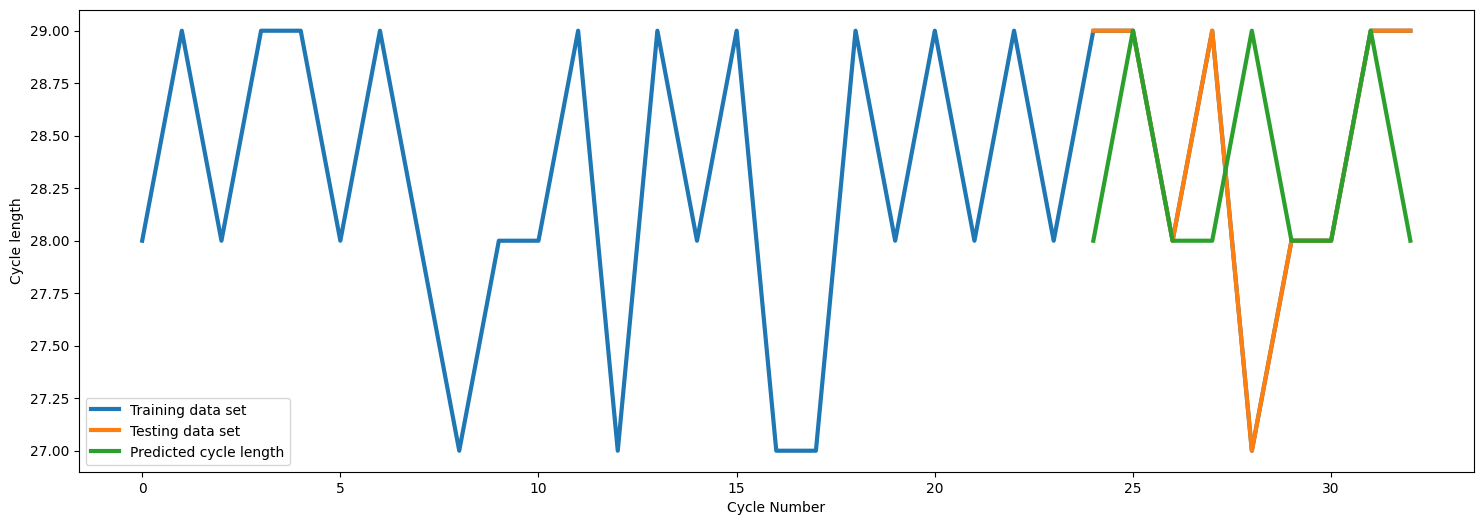

In [25]:
plt.figure(figsize=(18,6))
plt.plot(data,label="Training data set",linewidth=3)
plt.plot(X_test,label="Testing data set",linewidth=3)
plt.plot(prediction,label="Predicted cycle length",linewidth=3)
plt.legend(loc = 'best')
plt.xlabel("Cycle Number")
plt.ylabel("Cycle length")
plt.show()

MAE: 0.5555555555555556
RMSE: 0.8819171036881969


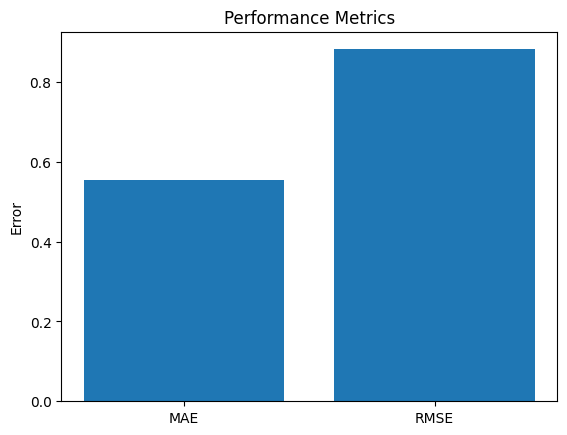

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(X_test, prediction)
print("MAE:", mae)


rmse = mean_squared_error(X_test, prediction
                          , squared=False)
print("RMSE:", rmse)
plt.figure()
plt.bar(['MAE', 'RMSE'], [mae, rmse])
plt.title('Performance Metrics')
plt.ylabel('Error')
plt.savefig('performance_metrics.png')

In [27]:
print(future_predictions)

33    28.0
34    29.0
35    29.0
36    28.0
37    29.0
38    29.0
39    28.0
40    29.0
41    29.0
42    28.0
dtype: float64


In [28]:
future=future_predictions+X_test

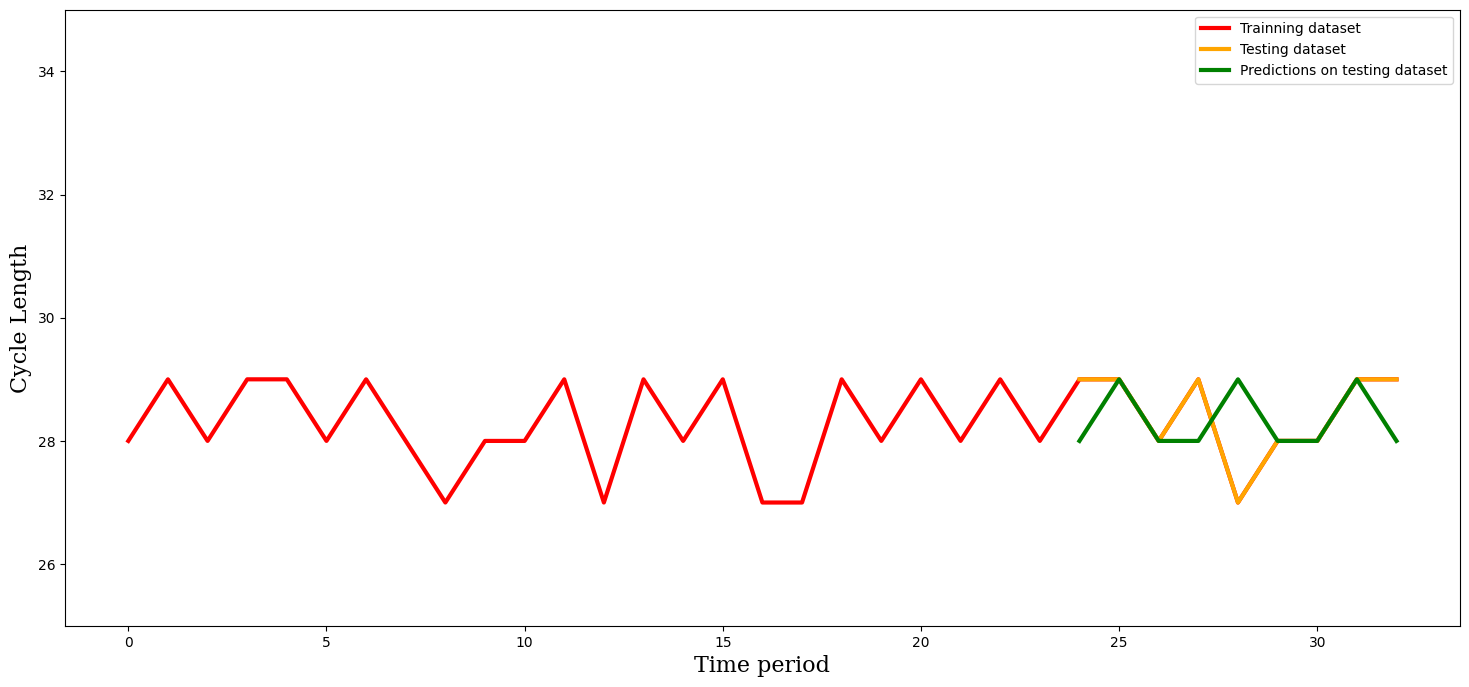

In [34]:
# Concatenate the past values and future predictions
all_prediction = pd.concat([prediction, future_predictions])

plt.figure(figsize=(18,8))
p=prediction
font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 16}
plt.plot(data,label='Trainning dataset',color='red',linewidth=3 )
plt.plot(X_test, label = 'Testing dataset', color='orange',linewidth=3)
# Plot the past values and future predictions
#prediction = prediction.drop(prediction.index[0])

plt.plot(prediction,label='Predictions on testing dataset',color='green',linewidth=3)
#plt.plot(future, label = 'Predictions of future value')
#plt.plot(future_predictions, label = 'Predictions of  value',color='black',linewidth=3)
plt.ylim(25, 35)
plt.legend(fontsize=14)



plt.legend(loc='best')
plt.xlabel("Time period", fontdict=font)
plt.ylabel("Cycle Length", fontdict=font)
plt.show()


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(X_test, future_predictions)
print("MAE:", mae)


rmse = mean_squared_error(X_test, future_predictions, squared=False)
print("RMSE:", rmse)
plt.figure()
plt.bar(['MAE', 'RMSE'], [mae, rmse])
plt.title('Performance Metrics')
plt.ylabel('Error')
plt.savefig('performance_metrics.png')

ValueError: Found input variables with inconsistent numbers of samples: [9, 10]

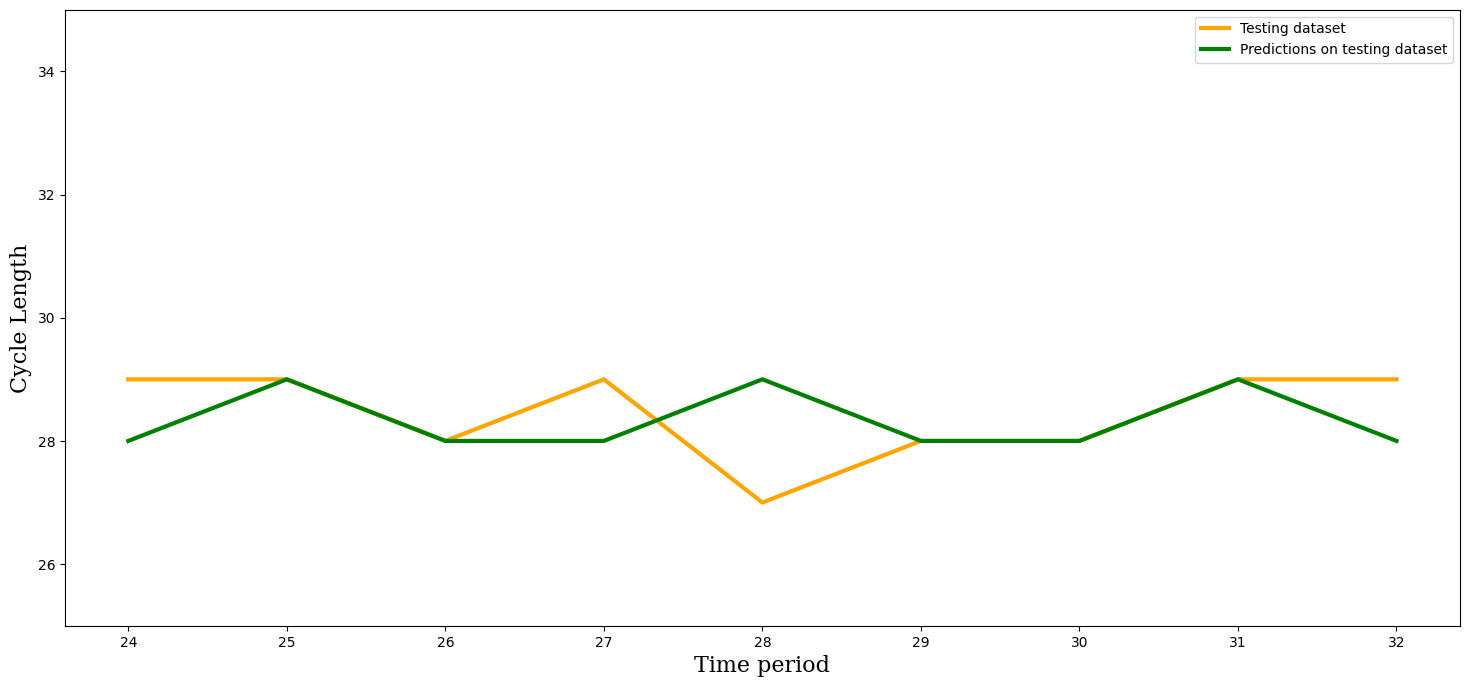

In [33]:
prediction=p
# Concatenate the past values and future predictions
all_prediction = pd.concat([prediction, future_predictions])
font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 16}
plt.figure(figsize=(18,8))
# Plot the past values and future predictions

#plt.plot(future_predictions, label = 'Predictions of future value',color='black',linewidth=3)

plt.plot(X_test, label = 'Testing dataset', color='orange',linewidth=3)
plt.plot(prediction,label='Predictions on testing dataset',color='green',linewidth=3)
plt.legend(loc='best')
plt.ylim(25, 35)
plt.xlabel("Time period", fontdict=font)
plt.ylabel("Cycle Length", fontdict=font)
plt.show()
